<a href="https://colab.research.google.com/github/Thicabien2004/Plant-project/blob/main/Raw_species_count_data_and_rarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
print(sns.__version__)


0.13.2


In [ ]:
import jupyter_core
print(jupyter_core.__version__)


5.8.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_species_count_EPBC = pd.read_csv('/content/drive/MyDrive/PLANT RESEARCH/datasets/1-raw-species-counts-Rham - All.EPBC.csv')


In [ ]:
raw_species_count_EPBC

,Genus,Total sp.,Total rare sp.
0,Blackallia,1,1
1,Cryptandra,69,10
2,Papistylus,2,1
3,Polianthion,4,3
4,Pomaderris,70,14
5,Serichonus,1,1
6,Sigfriedia,1,0
7,Spyridium,46,10
8,Stenanthemum,31,10
9,Trymalium,13,2


In [ ]:
raw_species_count_EPBC['Total non-rare sp.'] = raw_species_count_EPBC['Total sp.'] - raw_species_count_EPBC['Total rare sp.']
raw_species_count_EPBC

,Genus,Total sp.,Total rare sp.,Total non-rare sp.
0,Blackallia,1,1,0
1,Cryptandra,69,10,59
2,Papistylus,2,1,1
3,Polianthion,4,3,1
4,Pomaderris,70,14,56
5,Serichonus,1,1,0
6,Sigfriedia,1,0,1
7,Spyridium,46,10,36
8,Stenanthemum,31,10,21
9,Trymalium,13,2,11


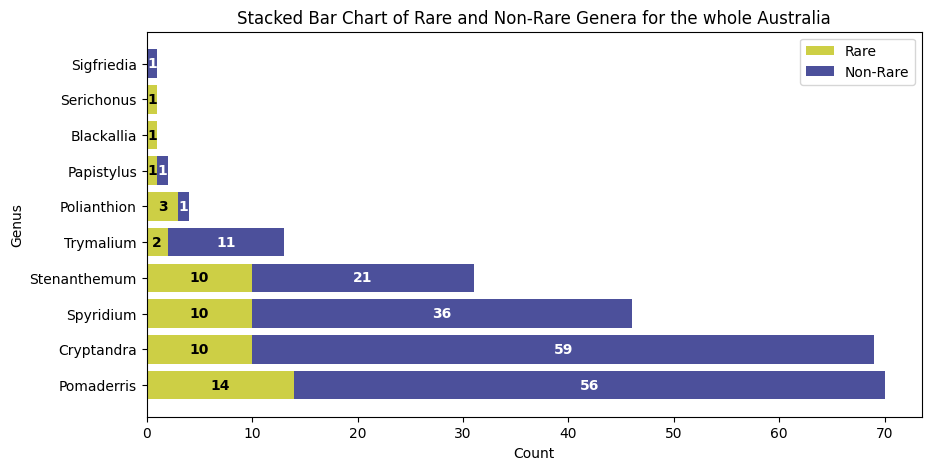

In [ ]:
# Sort the DataFrame by 'Total sp.' in descending order
raw_species_count_EPBC_sorted = raw_species_count_EPBC.sort_values(by='Total sp.', ascending=False)

# Plot stacked bar chart (rare_genus_counts at the bottom)
plt.figure(figsize=(10, 5))
plt.barh(raw_species_count_EPBC_sorted['Genus'], raw_species_count_EPBC_sorted['Total rare sp.'], color='#CDCF45', label='Rare')  # Bottom layer
plt.barh(raw_species_count_EPBC_sorted['Genus'], raw_species_count_EPBC_sorted['Total non-rare sp.'], left=raw_species_count_EPBC_sorted['Total rare sp.'], color='#4C509B', label='Non-Rare')  # Stacked on top


# Add the text labels to show the counts on the bars
for i, (rare, non_rare) in enumerate(zip(raw_species_count_EPBC_sorted['Total rare sp.'], raw_species_count_EPBC_sorted['Total non-rare sp.'])):
    if rare > 0:
        plt.text(rare / 2, i, str(rare), ha='center', va='center', color='black', fontsize=10,fontweight = 'bold')
    if non_rare > 0:
        plt.text(rare + non_rare / 2, i, str(non_rare), ha='center', va='center', color='white', fontsize=10, fontweight = 'bold')


plt.xlabel("Count")
plt.ylabel("Genus")
plt.title("Stacked Bar Chart of Rare and Non-Rare Genera for the whole Australia")
plt.legend()
plt.show()

In [ ]:
raw_species_count_WA = pd.read_csv('/content/drive/MyDrive/PLANT RESEARCH/datasets/1-raw-species-counts-Rham - WA.Priority.csv')


In [ ]:
raw_species_count_WA

,Genus,Total species WA,Rare sp. (WA Priority)
0,Blackallia,1.0,1
1,Cryptandra,36.0,12
2,Papistylus,2.0,2
3,Polianthion,3.0,2
4,Pomaderris,6.0,1
5,Serichonus,1.0,1
6,Sigfriedia,1.0,0
7,Spyridium,16.0,6
8,Stenanthemum,26.0,13
9,Trymalium,12.0,3


In [ ]:
raw_species_count_WA.drop(index = 10, inplace = True)
raw_species_count_WA['Total species WA'] =  raw_species_count_WA['Total species WA'].astype(int)
raw_species_count_WA['Rare sp. (WA Priority)'] =  raw_species_count_WA['Rare sp. (WA Priority)'].astype(int)

In [ ]:
raw_species_count_WA

,Genus,Total species WA,Rare sp. (WA Priority)
0,Blackallia,1,1
1,Cryptandra,36,12
2,Papistylus,2,2
3,Polianthion,3,2
4,Pomaderris,6,1
5,Serichonus,1,1
6,Sigfriedia,1,0
7,Spyridium,16,6
8,Stenanthemum,26,13
9,Trymalium,12,3


In [ ]:
raw_species_count_WA['Non-rare sp. (WA Priority)'] = raw_species_count_WA['Total species WA'] - raw_species_count_WA['Rare sp. (WA Priority)']


In [ ]:
raw_species_count_WA

,Genus,Total species WA,Rare sp. (WA Priority),Non-rare sp. (WA Priority)
0,Blackallia,1,1,0
1,Cryptandra,36,12,24
2,Papistylus,2,2,0
3,Polianthion,3,2,1
4,Pomaderris,6,1,5
5,Serichonus,1,1,0
6,Sigfriedia,1,0,1
7,Spyridium,16,6,10
8,Stenanthemum,26,13,13
9,Trymalium,12,3,9


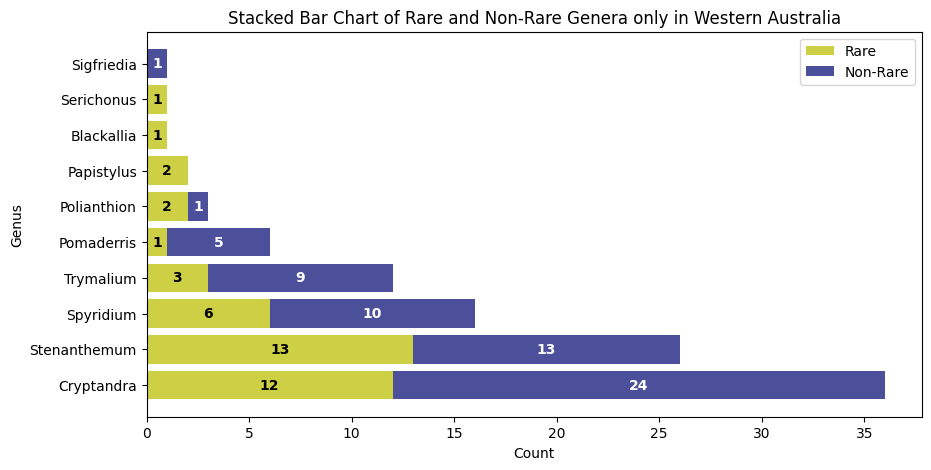

In [ ]:
# Sort the DataFrame by 'Total sp.' in descending order
raw_species_count_WA_sorted = raw_species_count_WA.sort_values(by='Total species WA', ascending=False)

# Plot stacked bar chart (rare_genus_counts at the bottom)
plt.figure(figsize=(10, 5))
plt.barh(raw_species_count_WA_sorted['Genus'], raw_species_count_WA_sorted['Rare sp. (WA Priority)'], color='#CDCF45', label='Rare')  # Bottom layer
plt.barh(raw_species_count_WA_sorted['Genus'], raw_species_count_WA_sorted['Non-rare sp. (WA Priority)'], left=raw_species_count_WA_sorted['Rare sp. (WA Priority)'], color='#4C509B', label='Non-Rare')  # Stacked on top


# Add the text labels to show the counts on the bars
for i, (rare, non_rare) in enumerate(zip(raw_species_count_WA_sorted['Rare sp. (WA Priority)'], raw_species_count_WA_sorted['Non-rare sp. (WA Priority)'])):
    if rare > 0:
        plt.text(rare / 2, i, str(rare), ha='center', va='center', color='black', fontsize=10,fontweight = 'bold')
    if non_rare > 0:
        plt.text(rare + non_rare / 2, i, str(non_rare), ha='center', va='center', color='white', fontsize=10, fontweight = 'bold')


plt.xlabel("Count")
plt.ylabel("Genus")
plt.title("Stacked Bar Chart of Rare and Non-Rare Genera only in Western Australia")
plt.legend()
plt.show()